In [72]:
import pandas as pd 
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm
import numpy as np

In [144]:
train_df = pd.read_csv(r"C:\Users\abdul\Desktop\NLP\spam\SMS_train.csv")
train_df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [9]:
test_df = pd.read_csv(r"C:\Users\abdul\Desktop\NLP\spam\SMS_test.csv")
test_df.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


Text(0.5, 1.0, 'Label counts in testing set')

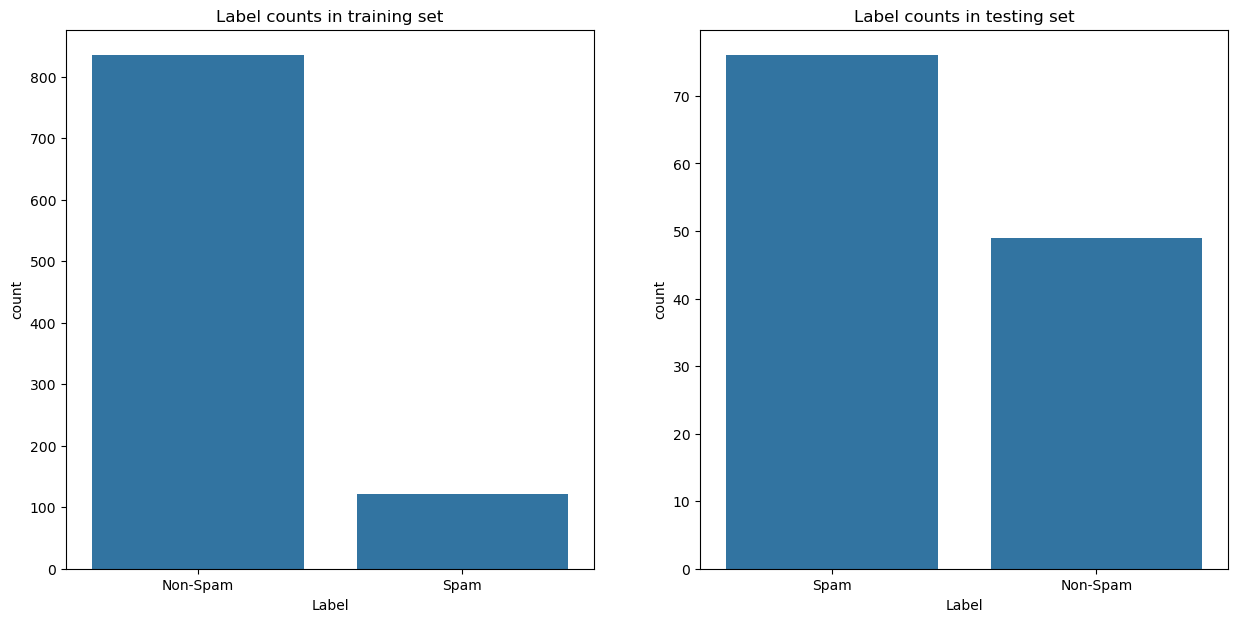

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(train_df["Label"].value_counts(),ax=ax[0])
sns.barplot(test_df["Label"].value_counts(),ax=ax[1])
ax[0].set_title("Label counts in training set")
ax[1].set_title("Label counts in testing set")

In [10]:
labels = {"Non-Spam":0,"Spam":1}
train_df["encoded_label"] = train_df["Label"].map(labels)
test_df["encoded_label"] = test_df["Label"].map(labels)

In [91]:
pretrained_model = SentenceTransformer("all-MiniLM-L6-v2")

In [92]:
train_vectors = []
train_labels = []
test_vectors = []
test_labels = []
for text , label in tqdm( zip(train_df["Message_body"],train_df["encoded_label"])):
    train_vectors.append(pretrained_model.encode(text))
    train_labels.append(label)

for text , label in tqdm( zip(test_df["Message_body"],test_df["encoded_label"])):
    test_vectors.append(pretrained_model.encode(text))
    test_labels.append(label)


train_vectors = np.array(train_vectors)  
train_labels = np.array(train_labels) 
test_vectors = np.array(test_vectors)
test_labels = np.array(test_labels)

957it [00:20, 45.85it/s]
125it [00:02, 43.49it/s]


In [93]:
print(train_vectors.shape)
print(test_vectors.shape)

(957, 384)
(125, 384)


In [128]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_vectors,train_labels)
acc= lg.score(test_vectors,test_labels)
print(f"Accuracy of logistic regression on test set :",acc)

accuracy of logistic regression on test set : 0.84


In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score= True,random_state=123)
rf.fit(train_vectors,train_labels)
acc = rf.score(test_vectors,test_labels)
print(f"Accuracy of RandomForest on test set :{acc:.2f}")
print(f"Out of bag accuracy :{rf.oob_score_:.2f}")

Accuracy of RandomForest on test set :0.85
Out of bag accuracy :0.96


In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier(random_state=123)
gc.fit(train_vectors,train_labels)
acc = gc.score(test_vectors,test_labels)
print(f"Accuracy of GradientBoosting on test set :,{acc:.2f}")

Accuracy of GradientBoosting on test set :,0.94
